# Disciplina Tópicos Especiais II (C318)

###### Curso: Fundamentos de Machine Learning
###### Alunas: Luana Gribel, Mariana Helena, Sarah Brandão e Sinara Pimenta
###### Professor: Ricardo Augusto

End-to-End Machine Learning Project - Análise e Modelagem - Dadaframe: Diabetes

-------------------------------------------------------------------------------------------------------------------------------

##### Objetivo: Prever se um paciente tem diabetes ou tendência a ter essa doença com bases em alguns dados médicos.

##### Regras de Negócio:
- É possível prever que um indivíduo pode possuir diabetes com base em dados médicos de forma automatizada, sem supervisão profissional?

- Qual o principal sintoma?

- Qual a principal doença recorrente em quem tem diabetes?

- Existe uma tendência maior em algum gênero ou faixa etária?

##### Tipo de problema: Classificação Binária

##### Enquadramento:
Aprendizagem supervisionada, porque a saída é conhecida.

## Importação de dados e bibliotecas

##### Bibliotecas utilizadas no projeto

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import LeavePOut 

##### Importação da base de dados

In [12]:
# Especificando diretório para carregamento do arquivo (.csv)
df = pd.read_csv('diabetes.csv')

In [4]:
# Informações sobre o dataframe (atributo info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

##### Informações sobre o dataset:

Contexto: Dataset obtido a partir da coleta de dados com a aplicação de questionários para os pacientes do Sylhet Diabetes Hospital in Sylhet em Bangladesh.

Atributos:

| Atributo | Descrição | Valores |
|--- |--- |--- |
| Age | Faixa etária abordada na pesquisa | 20-65 |
| Gender | Gênero | Male/Female |
| Polyuria | Termo médico que faz referência ao sintoma de urinar em excesso (acima de 2,5 litros por dia) | Yes/No |
| Polydipsia | Polidipsia é um termo médico que define o sintoma caracterizado por excessiva sensação de sede | Yes/No |
| Sudden weight loss | Perda de peso repentina | Yes/No |
| Weakness | Fraqueza | Yes/No |
| Polyphagia | Polifagia é um sinal médico que significa fome excessiva e ingestão anormalmente alta de sólidos pela boca | Yes/No |
| Genital thrush | (Candidíase) é uma infecção fúngica causada por qualquer tipo do fungo Candida. | Yes/No |
| Visual blurring | Visão turva | Yes/No |
| Itching | Coceira | Yes/No |
| Irritability | Irritabilidade | Yes/No |
| Delayed healing | Cura demorada | Yes/No |
| Partial paresis | Paresia (Diminuição da força muscular)| Yes/No |
| Muscle stiffness | Rigidez muscilar| Yes/No |
| Alopecia | Perda de pelos do corpo | Yes/No |
| Obesity | Obesidade | Yes/No |
| Class | Classificação (Possui ou não diabetes) | Positive/Negative |

## Manipulações iniciais nos dados

In [6]:
# Descrição estatística do atributo Age
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Conclusão:

In [21]:
# Verificando as variáveis categóricas
generos = df["Gender"].value_counts()
print(generos)
print('----------------------------')
poliuria = df["Polyuria"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Polydipsia"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["sudden weight loss"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["weakness"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Polyphagia"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Genital thrush"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["visual blurring"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Itching"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Irritability"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["delayed healing"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["partial paresis"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["muscle stiffness"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Alopecia"].value_counts()
print(poliuria)
print('----------------------------')
poliuria = df["Obesity"].value_counts()
print(poliuria)

Male      328
Female    192
Name: Gender, dtype: int64
----------------------------
No     262
Yes    258
Name: Polyuria, dtype: int64
----------------------------
No     287
Yes    233
Name: Polydipsia, dtype: int64
----------------------------
No     303
Yes    217
Name: sudden weight loss, dtype: int64
----------------------------
Yes    305
No     215
Name: weakness, dtype: int64
----------------------------
No     283
Yes    237
Name: Polyphagia, dtype: int64
----------------------------
No     404
Yes    116
Name: Genital thrush, dtype: int64
----------------------------
No     287
Yes    233
Name: visual blurring, dtype: int64
----------------------------
No     267
Yes    253
Name: Itching, dtype: int64
----------------------------
No     394
Yes    126
Name: Irritability, dtype: int64
----------------------------
No     281
Yes    239
Name: delayed healing, dtype: int64
----------------------------
No     296
Yes    224
Name: partial paresis, dtype: int64
---------------------

Text(0, 0.5, 'Quantidade de pessoas')

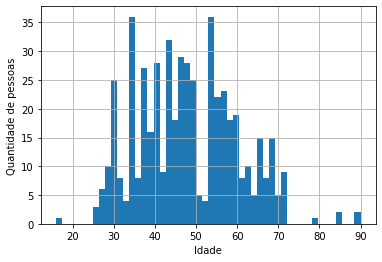

In [26]:
# Histograma plotado em cima da quantidade de pessoas
df['Age'].hist(bins = 50)
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')

In [22]:
# Biblioteca para análise de dados (visualizações estatísticas)
import klib

<AxesSubplot:xlabel='Age', ylabel='Density'>

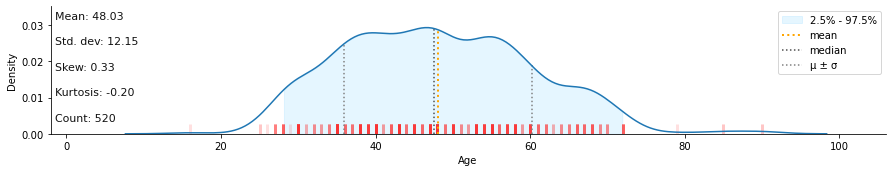

In [23]:
#Dispersão da variável Age
klib.dist_plot(df['Age'])

Análise conduzida a partir do gráfico:

1 - A faixa etária predominante dentre os entrevistados é a de 35 à 60 anos.

<AxesSubplot:xlabel='Age', ylabel='Density'>

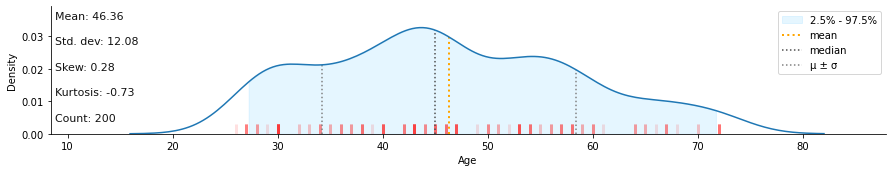

In [40]:
#Dispersão da variável Age, para pessoas que possuem diabetes
df_positive = df[(df['class']=='Positive')]
klib.dist_plot(df_positive['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

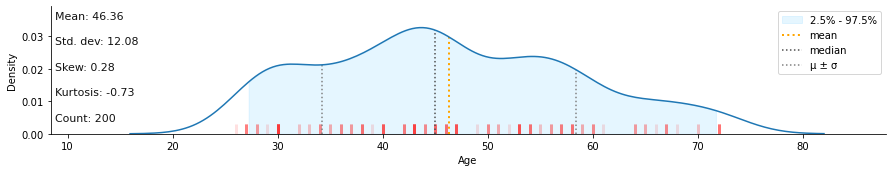

In [43]:
#Dispersão da variável Age, para pessoas que não possuem diabetes
df_negative = df[(df['class']=='Negative')]
klib.dist_plot(df_negative['Age'])

#### Preparação dos Dados - Manipulando features categóricas (ordinal encoder)

In [64]:
df = df.replace(['Male','Female','Yes','No','Positive','Negative'],(1,0,1,0,1,0))
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Métodos de Amostragem (Sampling Methods) 

Criação de conjuntos de dados de treino e teste. 

O método utilizado foi Leave P Out Cross Validation (LPOCV).

In [78]:
X = df.iloc[:, 0:16].to_numpy()
y = df.loc[:, 'class'].to_numpy()
lpo = LeavePOut(p=104) # p=104 para ser igual a 20% do conjunto total
lpo.get_n_splits(X)

for train_index, test_index in lpo.split(X):
    train_set = df.loc[train_index]
    test_index = df.loc[test_index]
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KeyboardInterrupt: 

In [66]:
print(f"Tamanho conjunto de treino: {len(X_train)}")
print(f"Tamanho conjunto de teste: {len(X_test)}")

Tamanho conjunto de treino: 416
Tamanho conjunto de teste: 104


## Investigando Correlações

Será analisado o dataframe de treino.

In [84]:
# Fazendo a estimativa da matriz de correlação das variáveis do dataframe
correlation_matrix = train_set.corr(method='pearson')

<AxesSubplot:>

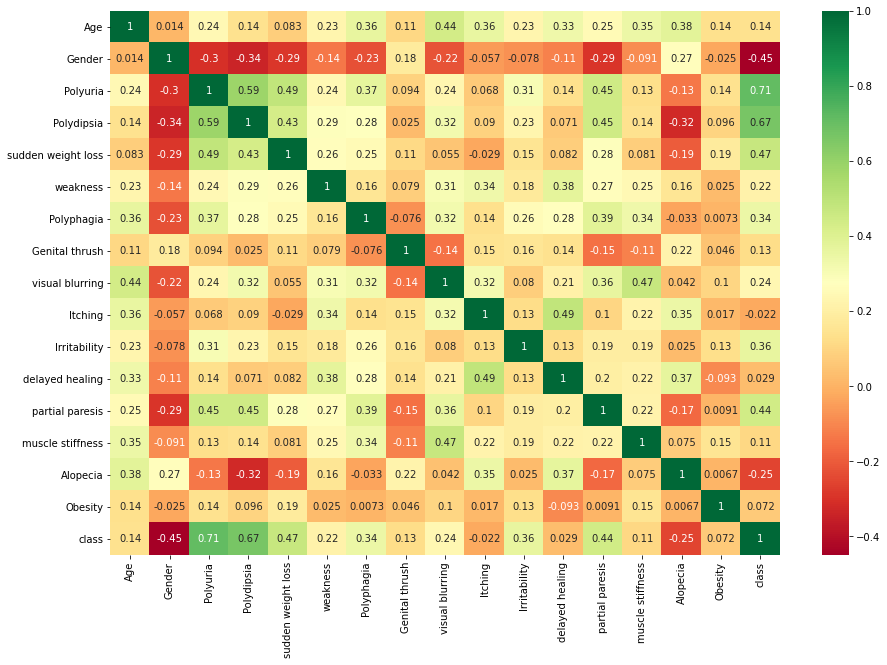

In [86]:
plt.figure(figsize=(15,10))
top_corr_features = correlation_matrix.index
sns.heatmap(correlation_matrix[top_corr_features],annot=True,cmap="RdYlGn")

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

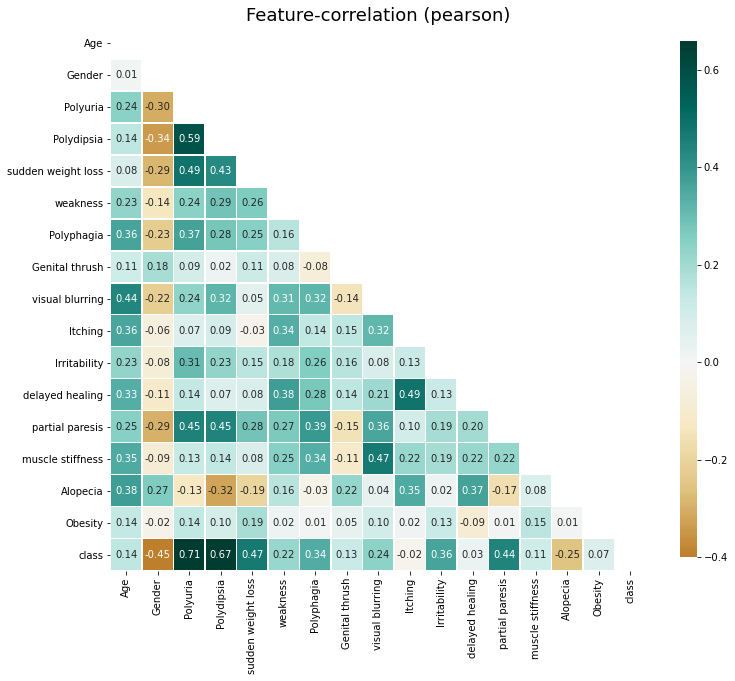

In [83]:
klib.corr_plot(train_set)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

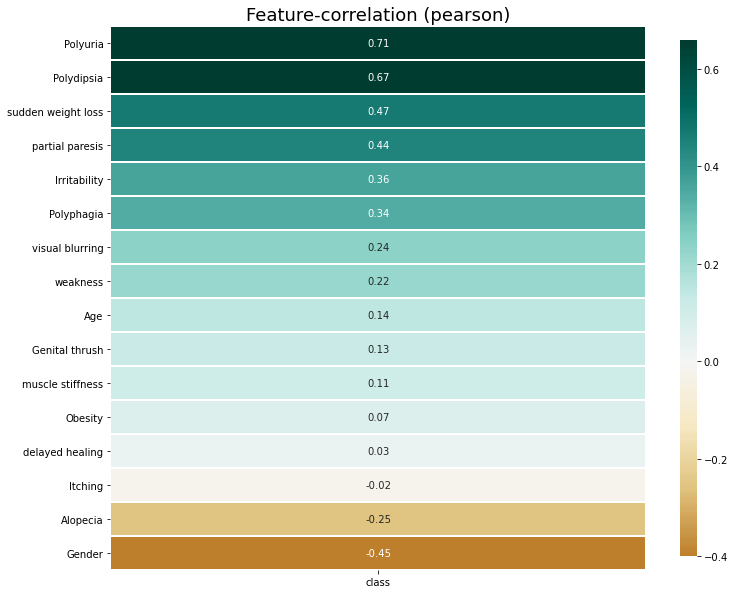

In [82]:
klib.corr_plot(train_set, target='class')

### Combinação de Atributos

### Modelagem - Mini-Exemplo de Treinamento do Modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))